# Binary Classifiers & Multiclass Classifiers

# 1. The Graphs of Odds, Logit and Sigmoid

## 1.1 The Graphs of Odds and Logit

In [2]:
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [7]:
# 0.01~0.99를 100으로 나누기
p_np = np.linspace(0.01, 0.99, 100)  # probability numpy
p_tf = tf.linspace(0.01, 0.99, 100)  # probability tensorflow

odds_np = p_np/(1-p_np)
odds_tf = p_tf/(1-p_tf)

logit_np = np.log(odds_np)
logit_tf = tf.math.log(odds_tf)

### 1.1.1 numpy graph

Text(0.5, 0, 'Probability')

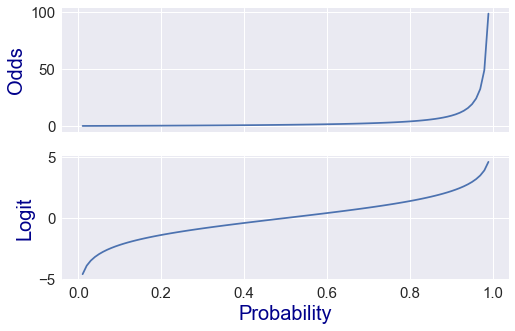

In [10]:
fig, axes = plt.subplots(2,1,figsize=(8,5), sharex=True)
axes[0].plot(p_np, odds_np)
axes[1].plot(p_np, logit_np)

xticks = np.arange(0, 1.1, 0.2)
axes[0].tick_params(labelsize=15)
axes[0].set_xticks(xticks)
axes[0].set_ylabel('Odds', fontsize=20, color='darkblue')
axes[1].tick_params(labelsize=15)
axes[1].set_xticks(xticks)
axes[1].set_ylabel('Logit', fontsize=20, color='darkblue')
axes[1].set_xlabel('Probability', fontsize=20, color='darkblue')

### 1.1.2 tensorflow graph

Text(0.5, 0, 'Probability')

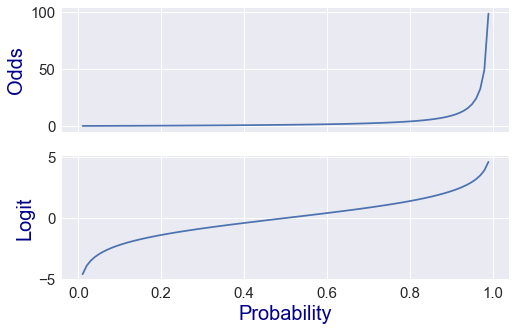

In [11]:
fig, axes = plt.subplots(2,1,figsize=(8,5), sharex=True)
axes[0].plot(p_tf, odds_tf.numpy())
axes[1].plot(p_tf, logit_tf.numpy())

xticks = np.arange(0, 1.1, 0.2)
axes[0].tick_params(labelsize=15)
axes[0].set_xticks(xticks)
axes[0].set_ylabel('Odds', fontsize=20, color='darkblue')
axes[1].tick_params(labelsize=15)
axes[1].set_xticks(xticks)
axes[1].set_ylabel('Logit', fontsize=20, color='darkblue')
axes[1].set_xlabel('Probability', fontsize=20, color='darkblue')

## 1.2 The Graphs of Sigmoid

In [12]:
import tensorflow as tf
from tensorflow.keras.layers import Activation

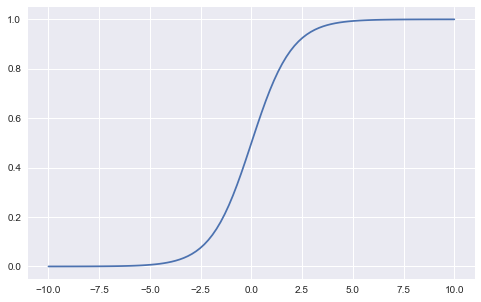

In [14]:
X = tf.linspace(-10, 10, 100)
sigmoid = Activation('sigmoid')(X)

fig, ax = plt.subplots(figsize=(8,5))
ax.plot(X.numpy(), sigmoid.numpy())

# 2. Logistic Regression Model

## 2.1 Single-variate Logistic Regression Models

In [15]:
import tensorflow as tf
from tensorflow.keras.layers import Dense

import matplotlib.pyplot as plt
plt.style.use('seaborn')

(100, 1)


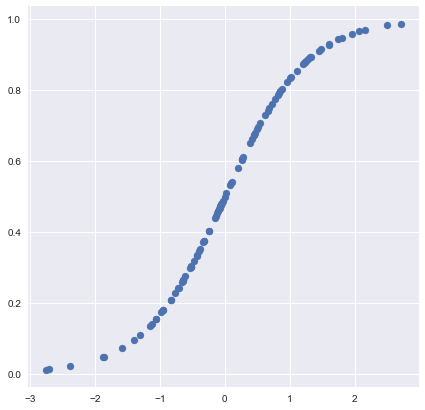

In [22]:
X = tf.random.normal(shape=(100,1))
dense = Dense(units=1, activation='sigmoid')

y = dense(X)
print(y.shape)

# sigmoid = 1 / (1 + e^(-(xw + b)))
# weight 값에 따라 우상향/우하향 그래프 생성
fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(X.numpy().flatten(), y.numpy().flatten())

## 2.2 Multi-variate Logistic Regression Models

- feature가 여러 개인 경우
- 3차원을 넘어가면 graph 그리기는 불가능

In [23]:
import tensorflow as tf
from tensorflow.keras.layers import Dense

import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [29]:
X = tf.random.normal(shape=(100,5))           # feature : 5개 (5차원)

# units=1
# - z값 5개가 affine transformation을 통과하면 1개로 됨
# - 즉 binary 값 (0 or 1)
dense = Dense(units=1, activation='sigmoid')

y = dense(X)
print(y.shape)

(100, 1)


# 3 Binary Classifier with Dense Layers

- 마지막 layer 값이 probability가 나오면 binary classifier : ★ sigmoid 사용

In [31]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [32]:
model = Sequential()
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=5, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))  # binary classifier

# 4. Softmax Layers

## 4.1 Input/Output of Softmax

In [43]:
import tensorflow as tf
from tensorflow.keras.layers import Activation

logit = tf.random.uniform(shape=(1,5), minval=-10, maxval=10)
softmax_value = Activation('softmax')(logit)
softmax_sum = tf.reduce_sum(softmax_value, axis=1)

print('Logits: \n', logit.numpy())
print('Probabilities: \n', softmax_value.numpy())
print('Sum of softmax values: \n', softmax_sum)

Logits: 
 [[ 9.845108   7.4827805 -7.192173   8.547714  -9.01032  ]]
Probabilities: 
 [[7.3129153e-01 6.8888180e-02 2.9167111e-08 1.9982028e-01 4.7345936e-09]]
Sum of softmax values: 
 tf.Tensor([1.], shape=(1,), dtype=float32)


In [44]:
import tensorflow as tf
from tensorflow.keras.layers import Activation

logit = tf.random.uniform(shape=(2,5), minval=-10, maxval=10)
softmax_value = Activation('softmax')(logit)
softmax_sum = tf.reduce_sum(softmax_value, axis=1)

print('Logits: \n', logit.numpy())
print('Probabilities: \n', softmax_value.numpy())
print('Sum of softmax values: \n', softmax_sum)

Logits: 
 [[-3.101275  -8.033474  -6.902268   2.2751808 -1.6948605]
 [-4.0842795  6.155243   3.4615116  5.637274   2.5076437]]
Probabilities: 
 [[4.51741926e-03 3.25734400e-05 1.00957914e-04 9.76912141e-01
  1.84369255e-02]
 [2.11488750e-05 5.91909826e-01 4.00297530e-02 3.52617949e-01
  1.54213831e-02]]
Sum of softmax values: 
 tf.Tensor([1. 1.], shape=(2,), dtype=float32)


## 4.2 Softmax in Dense Layers

- activation function으로서 softmax는 마지막 layer에서 작동함
- tf.random.uniform(shape=(8,5), minval=-10, maxval=10)
  - shape(8,5) : 이때 8은 마지막에 출력할 class의 개수를 의미 ★

In [45]:
import tensorflow as tf
from tensorflow.keras.layers import Dense

logit = tf.random.uniform(shape=(8,5), minval=-10, maxval=10)
dense = Dense(units=8, activation='softmax')

y = dense(logit)
print(tf.reduce_sum(y, axis=1))

tf.Tensor(
[0.99999994 1.         1.         0.99999994 0.9999999  1.
 0.99999994 1.        ], shape=(8,), dtype=float32)


# 5. Multi-class classifiers

- 마지막 y값
  - [[class1에 속할 확률, class2에 속할 확률, class3에 속할 확률], ...]
  - 합이 1이 됨

In [47]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense

class TestModel(Model):
    def __init__(self):
        super(TestModel, self).__init__()   # 이 부분은 무조건 일단 써 주기
        
        self.dense1 = Dense(units=8, activation='relu')
        self.dense2 = Dense(units=5, activation='relu')
        self.dense3 = Dense(units=3, activation='softmax')  # 마지막 output layer
        
    # forward propagation
    def call(self, x):
        print('X: {}\n{}\n'.format(x.shape, x.numpy()))
        
        x = self.dense1(x)
        print('A1: {}\n{}\n'.format(x.shape, x.numpy()))
        
        x = self.dense2(x)
        print('A2: {}\n{}\n'.format(x.shape, x.numpy()))
        
        x = self.dense3(x)
        print('y: {}\n{}\n'.format(x.shape, x.numpy()))
        print('Sum of vectors: {}\n'.format(tf.reduce_sum(x, axis=1)))
        return x

model = TestModel()

X = tf.random.uniform(shape=(8,5), minval=-10, maxval=10)
y = model(X)

X: (8, 5)
[[-8.084805  -4.342079  -3.85602    3.8323212  7.8334084]
 [ 2.3177357  5.880644   9.49548   -1.731472  -6.021464 ]
 [ 9.82361   -9.603737   2.5498276  8.587904  -1.1980009]
 [-8.257187   4.0693283 -3.789513   8.03241   -7.2325063]
 [-4.3007946 -7.930565  -2.3165393 -5.953231   0.8586788]
 [-6.2873983 -5.80076   -9.845007   8.224087  -9.217529 ]
 [ 1.1768484 -9.004467  -9.725754  -4.809265   4.831627 ]
 [-6.410589   5.2882433  6.0252304  8.816797   4.6297092]]

A1: (8, 8)
[[ 0.          3.580684    1.5761817   2.6103373   0.          2.5952227
   0.          0.        ]
 [ 4.3310404   0.          0.          0.          0.          0.
   0.          4.000597  ]
 [ 1.4892869   0.          0.          0.841431   12.58939     8.844791
   2.4313686   0.69081473]
 [ 0.          0.          0.          0.          3.247823    0.
   5.72784     0.        ]
 [ 0.          2.8562465   8.735385    8.830214    0.          4.2209086
   2.3228657   0.        ]
 [ 0.          0.          4